In [1]:
import os

In [2]:
import numpy as np
pi = np.pi

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = "serif"


In [3]:
PLT_DEFAULT_COLOURS = plt.rcParams['axes.prop_cycle'].by_key()['color']
PLT_ADJUSTED_COLOURS = [
    'dodgerblue',
    'orange',
    'limegreen',
    'orangered',
    'orchid',
    'sandybrown',
    'violet',
    'lightgrey',
    'greenyellow',
    'aqua',
]
PLT_TERMINAL_COLOURS_LIGHT = [
    '#cc6666',
    '#b5bd68',
    '#81a2be',
    '#f0c674',
    '#b294bb',
    '#8abeb7',
    '#c5c8c6',
]
PLT_TERMINAL_COLOURS_NORMAL = [
    '#a54242',
    '#8c9440',
    '#5f819d',
    '#de935f',
    '#85678f',
    '#5e8d87',
    '#707880',
]

plt.style.use('dark_background')

from cycler import cycler

default_cycler = ( cycler( color=PLT_TERMINAL_COLOURS_LIGHT ) )
plt.rc('axes', prop_cycle=default_cycler)


In [4]:
import util

In [5]:
devs = util.devices.load_all()

In [6]:
for dev in devs:
    print(dev.descr_str())

LED: Thorlabs SOLIS 3C
Halogen Lamp: Olympus U-LH100L-3
Objective Lens: Olympus UPlanApo x100
Tube Lens: Thorlabs AC254-250-A1-ML
Diffraction Grating: Thorlabs GT25-03
EMCCD: Andor iXon DV885-LC-VP


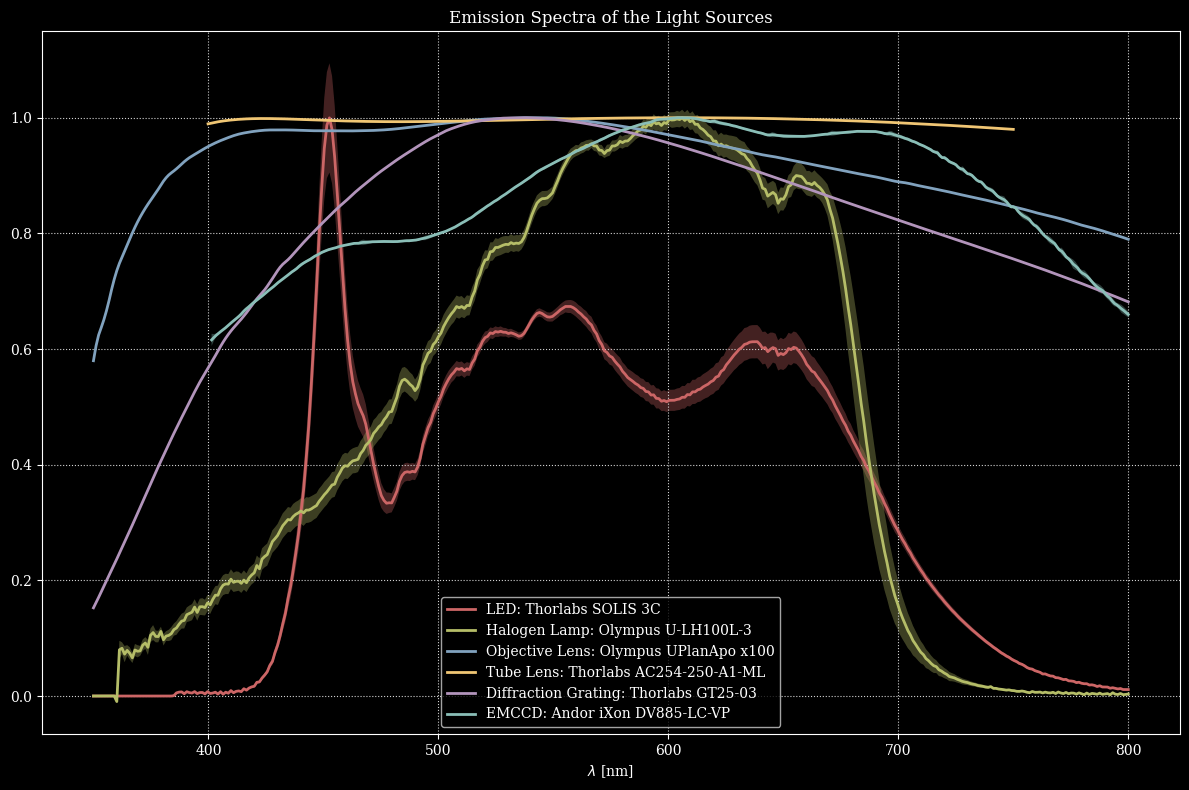

In [7]:
fig = plt.figure(figsize=(12,8), dpi=100)
#fig.patch.set_facecolor('white')

axs = fig.add_gridspec(1, 1)

ax = fig.add_subplot(axs[0, 0])

for dev in devs:
    TEST_LDA = np.linspace( np.maximum(dev.ldamin, 350), 
                            np.minimum(dev.ldamax, 800), 
                            400 )
    dev_eval = dev.evaluate(TEST_LDA)
    ax.fill_between( TEST_LDA, dev_eval[0]-dev_eval[1], dev_eval[0]+dev_eval[1], alpha=0.333, )#color=line[1] )
    ax.plot( TEST_LDA, dev_eval[0], lw=2, label=dev.descr_str() )#color=line[1] )
    
ax.set_title("Emission Spectra of the Light Sources")
ax.set_xlabel('$\lambda$ [nm]')
ax.set_ylabel('')

ax.legend()

ax.grid(color='lightgrey', linestyle=':')

plt.tight_layout()
plt.show()
